This project demonstrates the application of transfer learning for object detection. We utilize a pre-trained YOLO model, adapting its weights by retraining it on the COCO128 dataset. COCO128, a curated subset of the original COCO dataset, serves as our training data to explore how pre-trained knowledge can be effectively transferred to a new dataset.

In [1]:
# Download the zip file, unzip it into the Colab root folder, and delete the zip file.
!curl -L https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip -o coco128.zip
!unzip -q coco128.zip
!rm coco128.zip
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  8641k      0 --:--:-- --:--:-- --:--:-- 8641k
coco128  sample_data


In [2]:
import os
import random
import shutil
from IPython.display import Image, display

In [3]:
# Split the dataset into training and validation
images_file = os.listdir("/content/coco128/images/train2017")
random.shuffle(images_file)

train_split = 0.8 # 80% for training, 20% for validation.
split_index = int(len(images_file) * train_split)

train_files = images_file[:split_index]
val_files = images_file[split_index:]

print(f"Total images: {len(images_file)}")
print(f"Total training images: {len(train_files)}")
print(f"Total validation images: {len(val_files)}")

Total images: 128
Total training images: 102
Total validation images: 26


In [4]:
os.makedirs("/content/train/images", exist_ok=True)
os.makedirs("/content/train/labels", exist_ok=True)
os.makedirs("/content/val/images", exist_ok=True)
os.makedirs("/content/val/labels", exist_ok=True)

In [5]:
def move_files(file_list, source_img_dir, source_lbl_dir, dest_img_dir, dest_lbl_dir):
    for filename in file_list:
        shutil.move(os.path.join(source_img_dir, filename), os.path.join(dest_img_dir, filename))

        base_filename, _ = os.path.splitext(filename)
        label_filename = base_filename + ".txt"
        if os.path.exists(os.path.join(source_lbl_dir, label_filename)):
            shutil.move(os.path.join(source_lbl_dir, label_filename), os.path.join(dest_lbl_dir, label_filename))
        else:
            print(f"Label not found: {filename}")

In [6]:
move_files(file_list = train_files, source_img_dir = "/content/coco128/images/train2017", source_lbl_dir = "/content/coco128/labels/train2017", dest_img_dir = "/content/train/images", dest_lbl_dir = "/content/train/labels")

images_list = os.listdir("/content/train/images")
labels_list = os.listdir("/content/train/labels")
print(f"Number of images in the training dataset: {len(images_list)}")
print(f"Number of labels in the training dataset: {len(labels_list)}")

Label not found: 000000000508.jpg
Label not found: 000000000250.jpg
Number of images in the training dataset: 102
Number of labels in the training dataset: 100


In [7]:
move_files(file_list = val_files, source_img_dir = "/content/coco128/images/train2017", source_lbl_dir = "/content/coco128/labels/train2017", dest_img_dir = "/content/val/images", dest_lbl_dir = "/content/val/labels")

images_list = os.listdir("/content/val/images")
labels_list = os.listdir("/content/val/labels")
print(f"Number of images in the validation dataset: {len(images_list)}")
print(f"Number of labels in the validation dataset: {len(labels_list)}")

Number of images in the validation dataset: 26
Number of labels in the validation dataset: 26


In [8]:
pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.6 MB/s eta 0:00:00


In [9]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
%%writefile coco128.yaml
train: /content/train/images
val: /content/val/images

nc: 80
names: [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]

Writing coco128.yaml


In [11]:
# Apply transfer learning by using the weights of a pre-trained YOLO network to train our dataset.
try:
    model = YOLO('yolov8n.pt')
    results = model.train(data="/content/coco128.yaml", epochs=10)
    print("Training finished successfully.")
except Exception as e:
    print(f"error occurred: {e}")

100%|██████████| 6.25M/6.25M [00:00<00:00, 102MB/s]


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/coco128.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

100%|██████████| 755k/755k [00:00<00:00, 22.2MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

Model summary: 129 layers, 3,157,200 parameters, 3,157,184 gradients, 8.9 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 38.0±16.7 MB/s, size: 80.7 KB)


train: Scanning /content/train/labels... 100 images, 2 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<00:00, 431.13it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 48.5±24.1 MB/s, size: 46.9 KB)


val: Scanning /content/val/labels... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<00:00, 779.74it/s]

val: New cache created: /content/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.235      1.457      1.229         54        640: 100%|██████████| 7/7 [01:54<00:00, 16.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.17s/it]

                   all         26        232      0.636      0.614      0.655      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G       1.14      1.485      1.192         35        640: 100%|██████████| 7/7 [01:45<00:00, 15.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.64s/it]

                   all         26        232      0.616      0.586      0.653      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.125      1.367      1.168         33        640: 100%|██████████| 7/7 [01:43<00:00, 14.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.90s/it]

                   all         26        232      0.602      0.608      0.636       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.132      1.338       1.18         39        640: 100%|██████████| 7/7 [01:41<00:00, 14.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.32s/it]

                   all         26        232      0.613       0.61      0.638      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.125      1.369      1.171         32        640: 100%|██████████| 7/7 [01:41<00:00, 14.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.89s/it]

                   all         26        232       0.61      0.637      0.635      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.141      1.259      1.152         43        640: 100%|██████████| 7/7 [01:40<00:00, 14.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.09s/it]

                   all         26        232      0.603      0.632      0.633      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.079      1.275      1.172         30        640: 100%|██████████| 7/7 [01:43<00:00, 14.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.56s/it]

                   all         26        232      0.587      0.626      0.625      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.079       1.21      1.161         39        640: 100%|██████████| 7/7 [01:41<00:00, 14.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.97s/it]

                   all         26        232      0.575      0.619      0.619      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.104      1.306      1.163         67        640: 100%|██████████| 7/7 [01:41<00:00, 14.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.82s/it]

                   all         26        232      0.561      0.623      0.634      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.049      1.098      1.129         28        640: 100%|██████████| 7/7 [01:41<00:00, 14.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.48s/it]

                   all         26        232      0.572      0.625      0.639      0.453



10 epochs completed in 0.318 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.11s/it]


                   all         26        232      0.636      0.614      0.655      0.476
                person         16         73      0.692      0.548      0.641      0.411
               bicycle          1          2      0.486        0.5      0.662      0.464
                   car          2          7      0.988      0.143      0.176     0.0939
            motorcycle          1          1      0.544          1      0.995      0.895
                   bus          2          3      0.567          1      0.995      0.913
                 train          1          1          1          0      0.995      0.895
             stop sign          1          1      0.595          1      0.995      0.796
                 bench          1          1          1          0          0          0
                   cat          2          2      0.927          1      0.995      0.896
                   dog          1          1      0.383          1      0.995      0.697
                 hors


image 1/1 /content/train/images/000000000036.jpg: 640x512 1 person, 1 umbrella, 253.8ms
Speed: 3.8ms preprocess, 253.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 512)
Results saved to /content/results/images


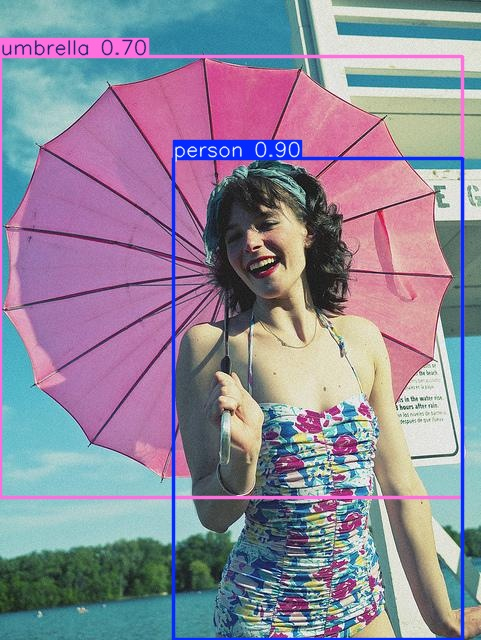

In [16]:
# pply the transfer learning weights to detect and classify a test image.
loaded_model = YOLO("/content/runs/detect/train/weights/best.pt")

results = loaded_model.predict(
    source='/content/train/images/000000000036.jpg',
    conf=0.25, # Threshold de confiança para exibição
    save=True, # Salva a imagem com as detecções
    project='/content/results',
    name='images',
    exist_ok=True
    )

display(Image(filename='/content/results/images/000000000036.jpg'))